In [2]:
import numpy as np
import os
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMinMax , TimeSeriesScalerMeanVariance
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [3]:
def normalization(type, X_train):
    if type =='custom':
        max_arr = np.zeros(9)
        min_arr = np.zeros(9)
        X_train_norm = np.zeros(X_train.shape)
        for i in range(9):
            max_arr[i] = np.max(X_train[:,:,i])
            min_arr[i] = np.min(X_train[:,:,i])
            X_train_norm[:,:,i] = (X_train[:,:,i] -  min_arr[i])/( max_arr[i]- min_arr[i])
    elif type == 'minmax':
        X_train_norm = TimeSeriesScalerMinMax(value_range=(0,1)).fit_transform(X_train)
    elif type == 'std':
        X_train_norm = TimeSeriesScalerMeanVariance(0,1).fit_transform(X_train)
    else: 
        X_train_norm = X_train
    return(X_train_norm)

In [4]:
# Get a list of all output filenames 
path = '/Users/muneeza/Documents/GitHub/GNNs_PrecisionAgriculture'
names_list = os.listdir(path+'/SWAT Data Reader/preproc_region02_ML/')

# Load all data 
n_sample = len(names_list)
n_tstep , n_feat = 12, 9
X_train = np.zeros((n_sample,n_tstep, n_feat))
for i, name in enumerate(names_list):
    X_train[i,:,:] = np.load(path+ '/SWAT Data Reader/preproc_region02_ML/'+name)

feat_names = ['MON' ,'RAIN', 'SNOW FALL', 'SURF Q', 'LAT Q', 'WATER YIELD', ' ET', 'SED YIELD', 'PET']

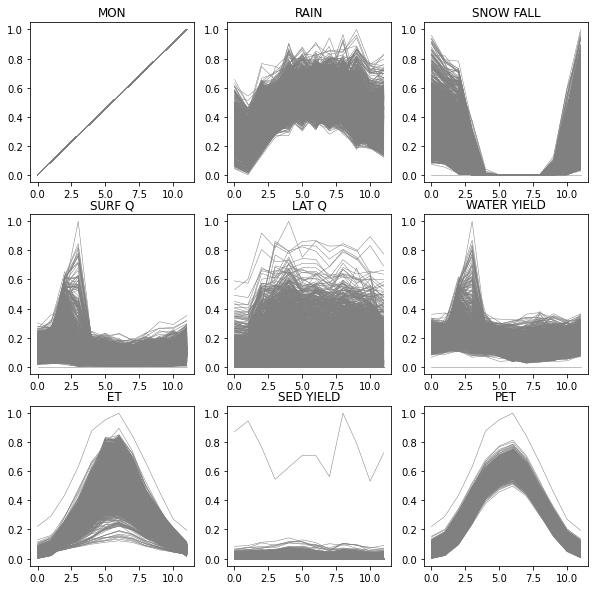

In [7]:
# Visualize Data 
fig, ax = plt.subplots(3,3,figsize=(10,10))

for i in range(3):
    for j in range(3):
        if i*3+j+1> 9 : # pass the others that we can't fill
            continue
        ax[i, j].plot(np.transpose(X_train_norm[:,:,i*3+j]), color='grey', linewidth=0.5)
        ax[i, j].set_title(feat_names[i*3+j])
plt.show()

In [34]:
# Normalize Data (CUSTOM)
X_train_norm = normalization('custom', X_train)

# Train model and predict labels 
model = TimeSeriesKMeans(n_clusters=30, metric="dtw", max_iter=10)
model.fit(X_train_norm)
labels = model.predict(X_train_norm)

In [35]:
# Save predicted clusters to disc
zipped = zip(names_list, labels)
clustering_custom = list(zipped)
textfile = open("clustering_custom.txt", "w")
for element in clustering_custom:
    print(element)
    textfile.write(element[0]+' , ')
    textfile.write(element[1].astype(str))
    textfile.write('\n')
textfile.close()

('020402030404_std.std.npy', 5)
('020503040103_std.std.npy', 13)
('020700051001_std.std.npy', 16)
('020200031002_std.std.npy', 22)
('020401040105_std.std.npy', 1)
('020402010303_std.std.npy', 9)
('020401060602_std.std.npy', 23)
('020700030803_std.std.npy', 10)
('020501060202_std.std.npy', 12)
('020801060201_std.std.npy', 18)
('020502010703_std.std.npy', 11)
('020200040307_std.std.npy', 1)
('020402070507_std.std.npy', 21)
('020200020503_std.std.npy', 7)
('020801020302_std.std.npy', 27)
('020302020505_std.std.npy', 15)
('020501020301_std.std.npy', 14)
('020802050603_std.std.npy', 18)
('020700110501_std.std.npy', 18)
('020802030901_std.std.npy', 20)
('020503050302_std.std.npy', 12)
('020402020605_std.std.npy', 19)
('020700030105_std.std.npy', 10)
('020502020205_std.std.npy', 4)
('020401040803_std.std.npy', 17)
('020200070601_std.std.npy', 8)
('020700010602_std.std.npy', 10)
('020200080403_std.std.npy', 8)
('020801080202_std.std.npy', 21)
('020401010207_std.std.npy', 1)
('020503010201_std.

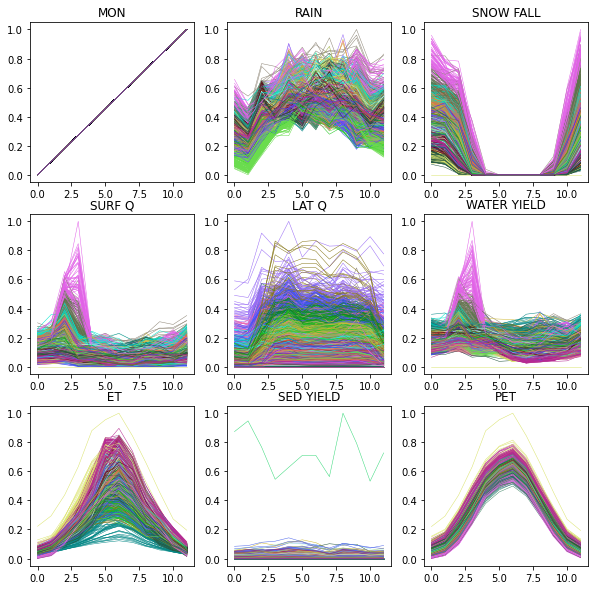

In [37]:
# # Load pre computed clusters
# path = '/Users/muneeza/Documents/GitHub/GNNs_PrecisionAgriculture'
# # load clustering 
# with open(path+'/Clustering Results/01_dtw_knn_custom.txt') as f:
#     lines = f.readlines()
# cluster = np.array([x.split()[2] for x in lines]).astype(int)

# Visualize Clustered Data 

# Sample colors for each cluster
from random import randint
color = []
n = 30
for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))

# Generate Subplot
fig, ax = plt.subplots(3,3,figsize=(10,10))
for i in range(3):
    for j in range(3):
        if i*3+j+1> 9 : # pass the others that we can't fill
            continue
        for k in range(n_sample):
            ax[i, j].plot(np.transpose(X_train_norm[k,:,i*3+j]), color=colour[cluster[k]], linewidth=0.5)
            ax[i, j].set_title(feat_names[i*3+j])
plt.show()
